Llamamos al archivo .csv

In [2]:
datos<-read.csv('/home/lorena/Escritorio/Estadistica aplicada y R/Literatura/Diseños factoriales/factorial 3x2x2.csv',header=T)

In [3]:
datos

Pelet,Temperatura,Salinidad,Tiempo
<int>,<int>,<int>,<dbl>
1,22,30,4.10
1,22,30,3.15
1,22,30,2.90
1,22,30,2.60
2,22,30,6.00
2,22,30,5.70
2,22,30,6.40
2,22,30,5.00
3,22,30,11.00


Indicar cuales de las variables deben ser consideradas como factores en caso de que las categorías hayan sido ingresadas con números

In [4]:
Pelet<-as.factor(datos$Pelet)

Temperatura <- as.factor(datos$Temperatura)

Salinidad<-as.factor(datos$Salinidad)

Definir el modelo lineal a utilizar, en nuestro caso un factorial de 3 factores (para ello se utilizan " * ")

In [5]:
m1<-lm(datos$Tiempo~Pelet*Temperatura*Salinidad)

pedir la tabla de anova

In [6]:
anova(m1)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
Pelet,2,512.05510417,256.02755208,6.095138e+02,1.728565e-28
Temperatura,1,8.54296875,8.54296875,2.033788e+01,6.647874e-05
Salinidad,1,19.57130208,19.57130208,4.659256e+01,5.560980e-08
Pelet:Temperatura,2,0.81593750,0.40796875,9.712337e-01,3.883155e-01
Pelet:Salinidad,2,5.92260417,2.96130208,7.049845e+00,2.608641e-03
Temperatura:Salinidad,1,0.00046875,0.00046875,1.115933e-03,9.735357e-01
Pelet:Temperatura:Salinidad,2,0.33843750,0.16921875,4.028518e-01,6.713867e-01
Residuals,36,15.12187500,0.42005208,NA,NA


Hay diferencias significativas en la interacción de pelet con salinidad, y de los tres factores.

Prueba de comparaciones múltilples

In [9]:
Tukey_test = TukeyHSD(aov(datos$Tiempo~Pelet*Temperatura*Salinidad))

In [10]:
Tukey_test$"Pelet:Salinidad"

,diff,lwr,upr,p adj
2:30-1:30,2.29375,1.3187999,3.2687001,3.749576e-07
3:30-1:30,8.39375,7.4187999,9.3687001,0.000000e+00
1:35-1:30,1.43125,0.4562999,2.4062001,1.152440e-03
2:35-1:30,4.34375,3.3687999,5.3187001,0.000000e+00
3:35-1:30,8.74375,7.7687999,9.7187001,0.000000e+00
3:30-2:30,6.10000,5.1250499,7.0749501,0.000000e+00
1:35-2:30,-0.86250,-1.8374501,0.1124501,1.085394e-01
2:35-2:30,2.05000,1.0750499,3.0249501,3.646624e-06
3:35-2:30,6.45000,5.4750499,7.4249501,0.000000e+00
1:35-3:30,-6.96250,-7.9374501,-5.9875499,0.000000e+00


Pedir las medias de las combinaciones a comparar, para ver quienes tiene los valores más altos o más bajos

In [8]:
medias1 <- tapply(datos$Tiempo, Pelet:Salinidad, mean)
medias1

1:30     1:35     2:30     2:35     3:30     3:35 
 3.86875  5.30000  6.16250  8.21250 12.26250 12.61250

In [13]:
Tukey_test$"Temperatura"

,diff,lwr,upr,p adj
24-22,0.84375,0.4643048,1.223195,6.647874e-05


In [14]:
medias2 <- tapply(datos$Tiempo, Temperatura, mean)
medias2

22       24 
7.647917 8.491667

**Gráfica de interacción de factores**

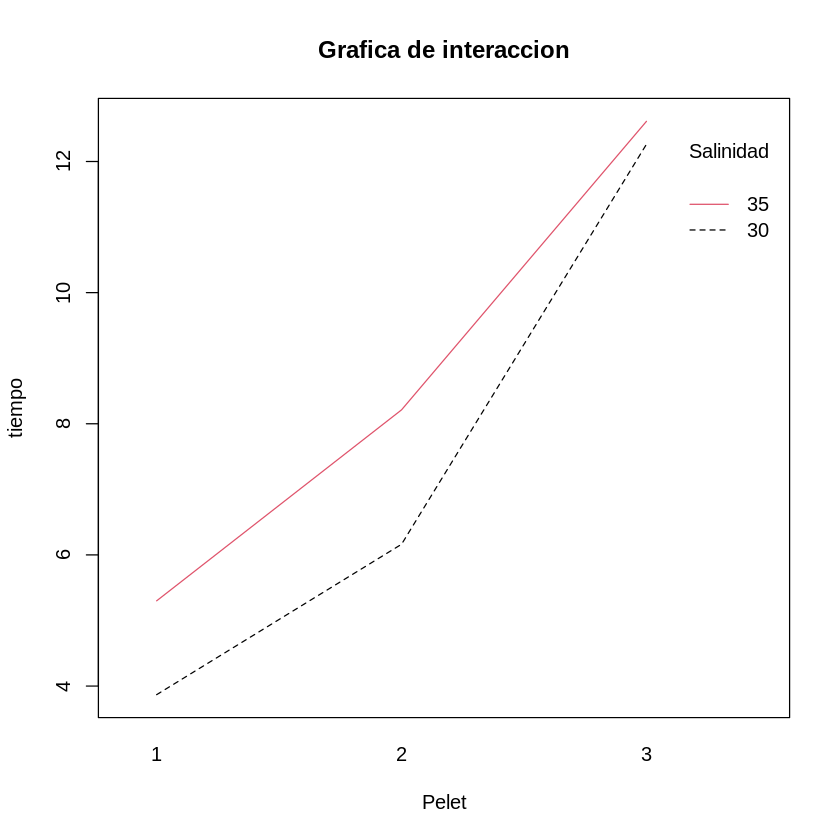

In [15]:
interaction.plot(Pelet,Salinidad,datos$Tiempo,type="l",main="Grafica de interaccion",xlab="Pelet",ylab="tiempo",col=1:3)

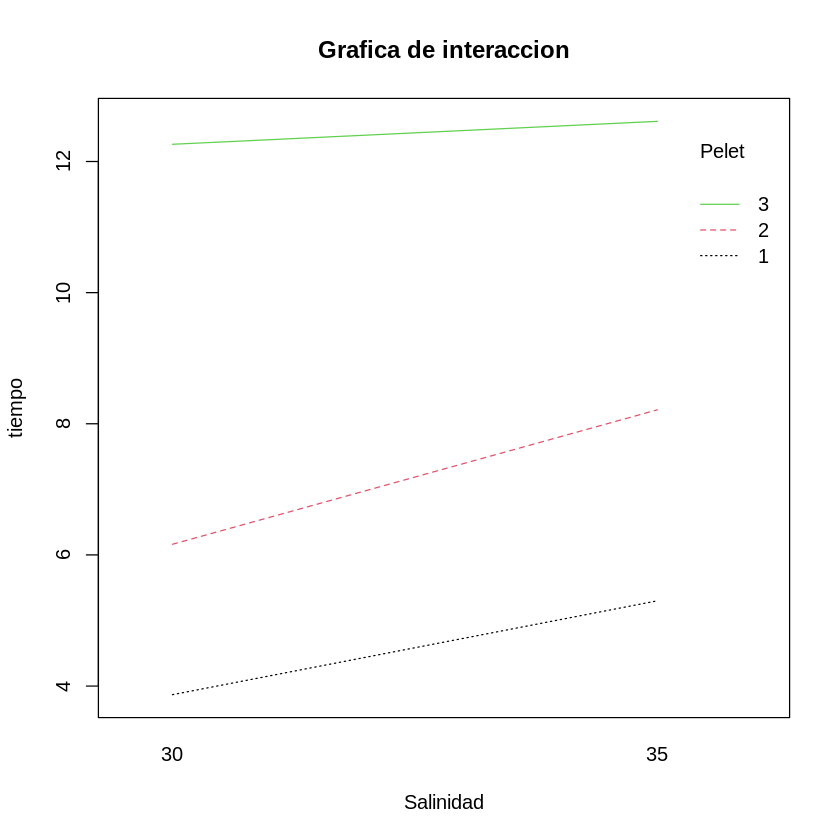

In [16]:
interaction.plot(Salinidad,Pelet,datos$Tiempo,type="l",main="Grafica de interaccion",xlab="Salinidad",ylab="tiempo",col=1:3)

Para hacer una gráfica de interacción de tres factores es necesario separar los datos para cada nivel de uno de los factores.

In [17]:
datosSalinidad30<-subset(datos, Salinidad==30)
datosSalinidad30
datosSalinidad35<-subset(datos, Salinidad==35)
datosSalinidad35

,Pelet,Temperatura,Salinidad,Tiempo
,<int>,<int>,<int>,<dbl>
1,1,22,30,4.10
2,1,22,30,3.15
3,1,22,30,2.90
4,1,22,30,2.60
5,2,22,30,6.00
6,2,22,30,5.70
7,2,22,30,6.40
8,2,22,30,5.00
9,3,22,30,11.00


,Pelet,Temperatura,Salinidad,Tiempo
,<int>,<int>,<int>,<dbl>
25,1,22,35,4.0
26,1,22,35,4.9
27,1,22,35,5.5
28,1,22,35,5.0
29,2,22,35,8.0
30,2,22,35,7.0
31,2,22,35,7.5
32,2,22,35,8.3
33,3,22,35,12.0


Volver a correr los modelos con cada uno de los niveles del factor seleccionado

In [18]:
m2<-lm(datosSalinidad30$Tiempo~datosSalinidad30$Pelet*datosSalinidad30$Temperatura)

In [19]:
m3 <-lm(datosSalinidad35$Tiempo~datosSalinidad35$Pelet*datosSalinidad35$Temperatura)

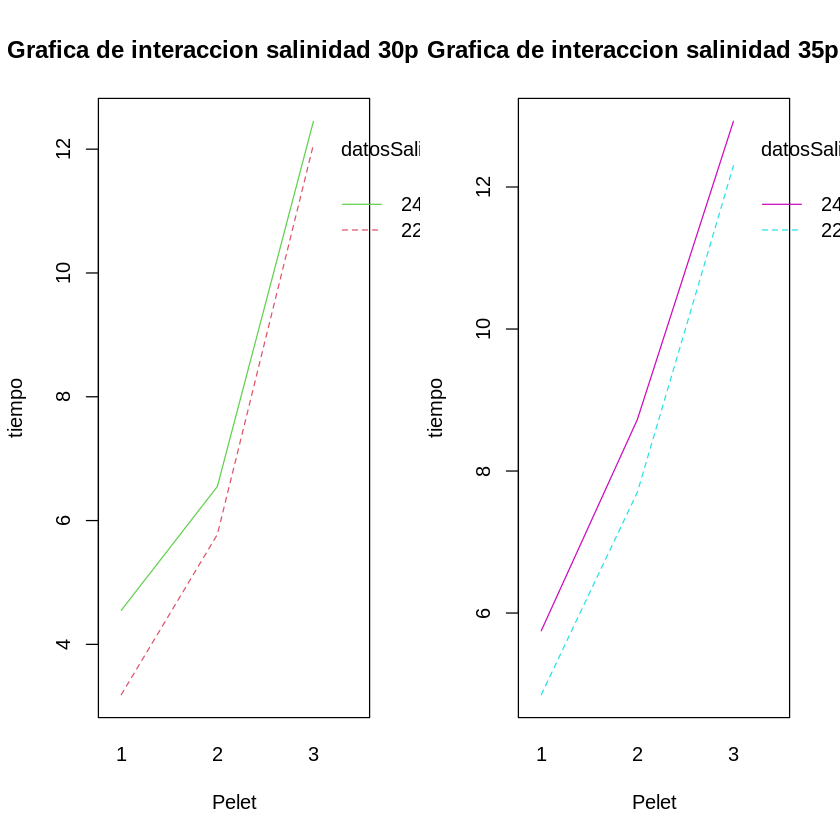

In [25]:
par(mfrow=c(1,2))

interaction.plot(datosSalinidad30$Pelet, datosSalinidad30$Temperatura, datosSalinidad30$Tiempo, type="l",main ="Grafica de interaccion salinidad 30ppm ", xlab="Pelet",ylab="tiempo", col=2:4)

interaction.plot(datosSalinidad35$Pelet, datosSalinidad35$Temperatura, datosSalinidad35$Tiempo, type="l",main ="Grafica de interaccion salinidad 35ppm ", xlab="Pelet",ylab="tiempo", col=5:6)

par(mfrow=c(1,1))

In [26]:
install.packages("dae")
install.packages("ggplot2")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [27]:
library(dae)
library(ggplot2)

Loading required package: ggplot2



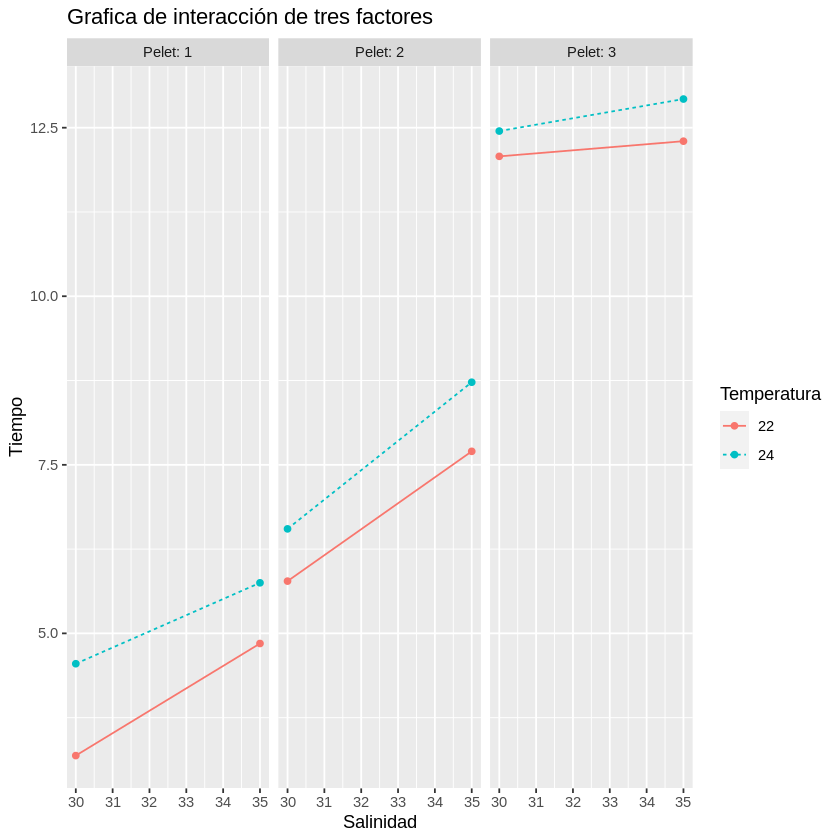

In [28]:
interaction.ABC.plot(Tiempo, x.factor = Salinidad, groups.factor = Temperatura, trace.factor = Pelet, data = datos, fun = "mean", title = "Grafica de interacción de tres factores", xlab = "Salinidad", ylab = "Tiempo", lwd = 4, columns = 2)

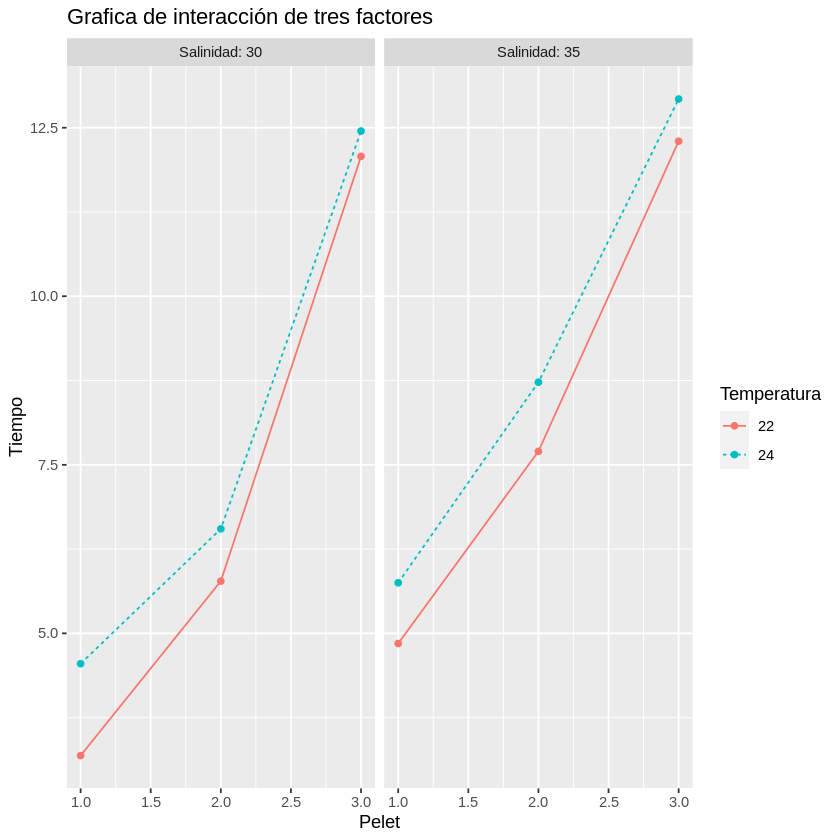

In [32]:
interaction.ABC.plot(Tiempo, x.factor = Pelet, groups.factor = Temperatura, trace.factor = Salinidad, data = datos, fun = "mean", title = "Grafica de interacción de tres factores", xlab = "Pelet", ylab = "Tiempo", lwd = 4, columns = 2)

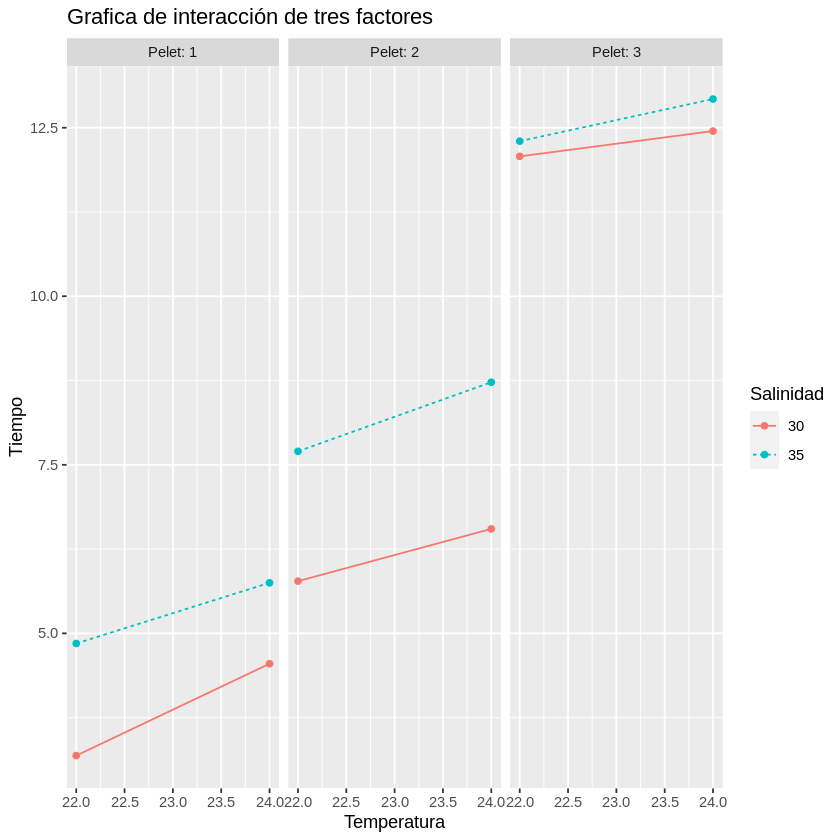

In [33]:
interaction.ABC.plot(Tiempo, x.factor = Temperatura, groups.factor = Salinidad, trace.factor = Pelet, data = datos, fun = "mean", title = "Grafica de interacción de tres factores", xlab = "Temperatura", ylab = "Tiempo", lwd = 4, columns = 2)

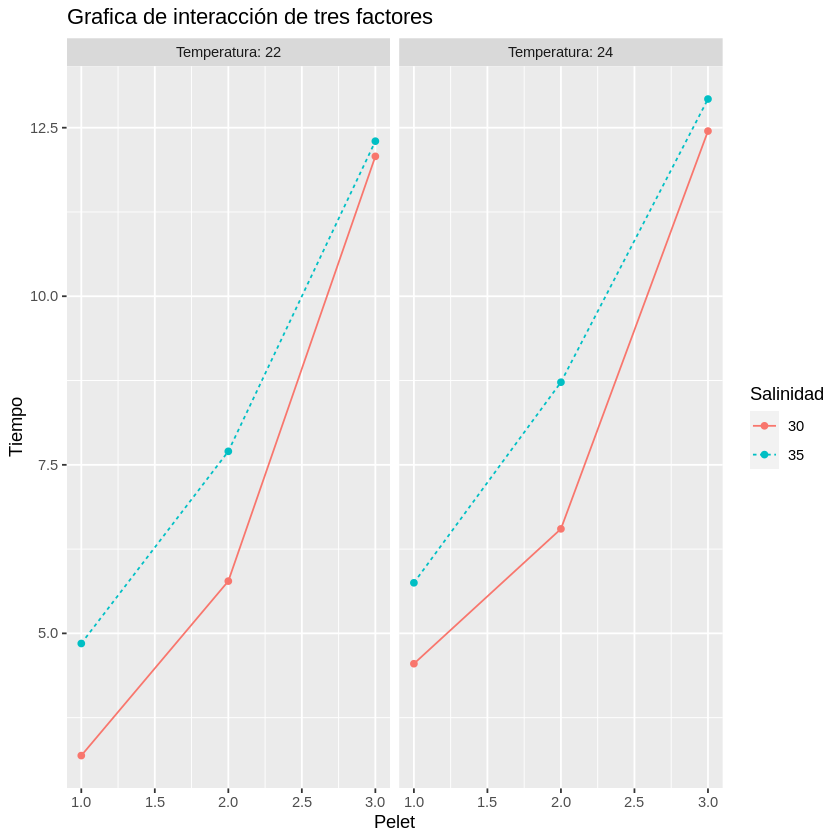

In [34]:
interaction.ABC.plot(Tiempo, x.factor = Pelet, groups.factor = Salinidad, trace.factor = Temperatura, data = datos, fun = "mean", title = "Grafica de interacción de tres factores", xlab = "Pelet", ylab = "Tiempo", lwd = 4, columns = 2)

Diagnóstico del modelo original de los 3 factores

Pedir los residuos

In [35]:
residuos<-resid(m1)
residuos

1       2       3       4       5       6       7       8       9      10 
 0.9125 -0.0375 -0.2875 -0.5875  0.2250 -0.0750  0.6250 -0.7750 -1.0750 -0.0750 
     11      12      13      14      15      16      17      18      19      20 
 0.2250  0.9250 -0.5500  0.4500 -0.8500  0.9500 -0.5500  0.4500  0.9500 -0.8500 
     21      22      23      24      25      26      27      28      29      30 
-0.5500  0.5500  0.0500 -0.0500 -0.8500  0.0500  0.6500  0.1500  0.3000 -0.7000 
     31      32      33      34      35      36      37      38      39      40 
-0.2000  0.6000 -0.3000  0.7000  0.4000 -0.8000  0.5500  0.2500 -0.1500 -0.6500 
     41      42      43      44      45      46      47      48 
 0.2750 -0.7250  0.6750 -0.2250 -0.1250  0.0750 -0.4250  0.4750

Valores estimados del modelo original

In [36]:
estimados<-m1$fitted.values
estimados

1       2       3       4       5       6       7       8       9      10 
 3.1875  3.1875  3.1875  3.1875  5.7750  5.7750  5.7750  5.7750 12.0750 12.0750 
     11      12      13      14      15      16      17      18      19      20 
12.0750 12.0750  4.5500  4.5500  4.5500  4.5500  6.5500  6.5500  6.5500  6.5500 
     21      22      23      24      25      26      27      28      29      30 
12.4500 12.4500 12.4500 12.4500  4.8500  4.8500  4.8500  4.8500  7.7000  7.7000 
     31      32      33      34      35      36      37      38      39      40 
 7.7000  7.7000 12.3000 12.3000 12.3000 12.3000  5.7500  5.7500  5.7500  5.7500 
     41      42      43      44      45      46      47      48 
 8.7250  8.7250  8.7250  8.7250 12.9250 12.9250 12.9250 12.9250

**Prueba de normalidad**

Gráfica normal

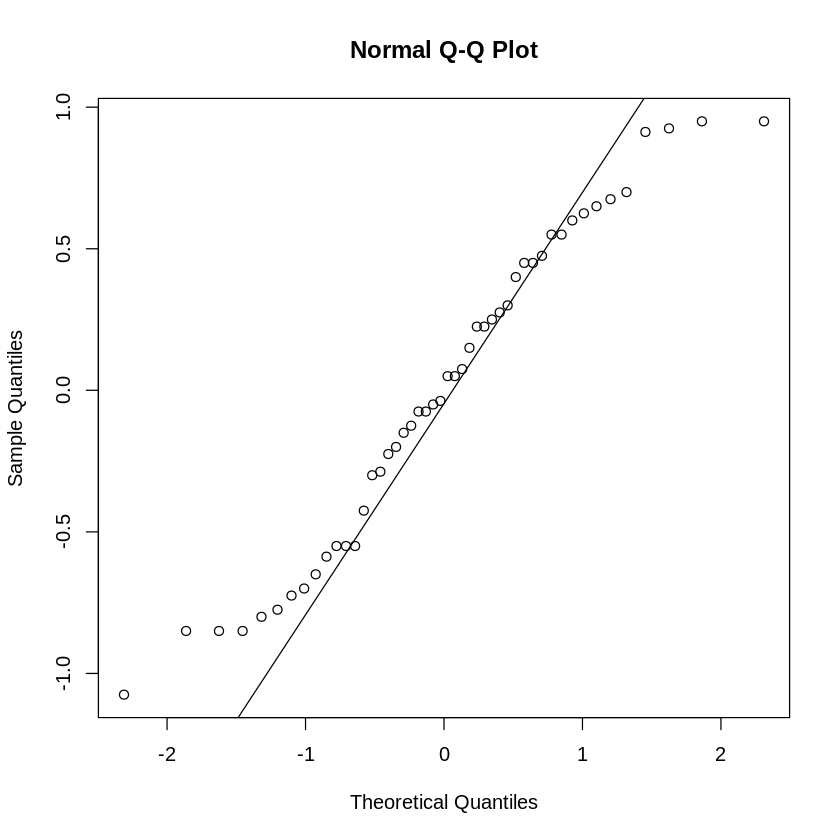

In [37]:
qqnorm(m1$res)
qqline(m1$res)

Histograma

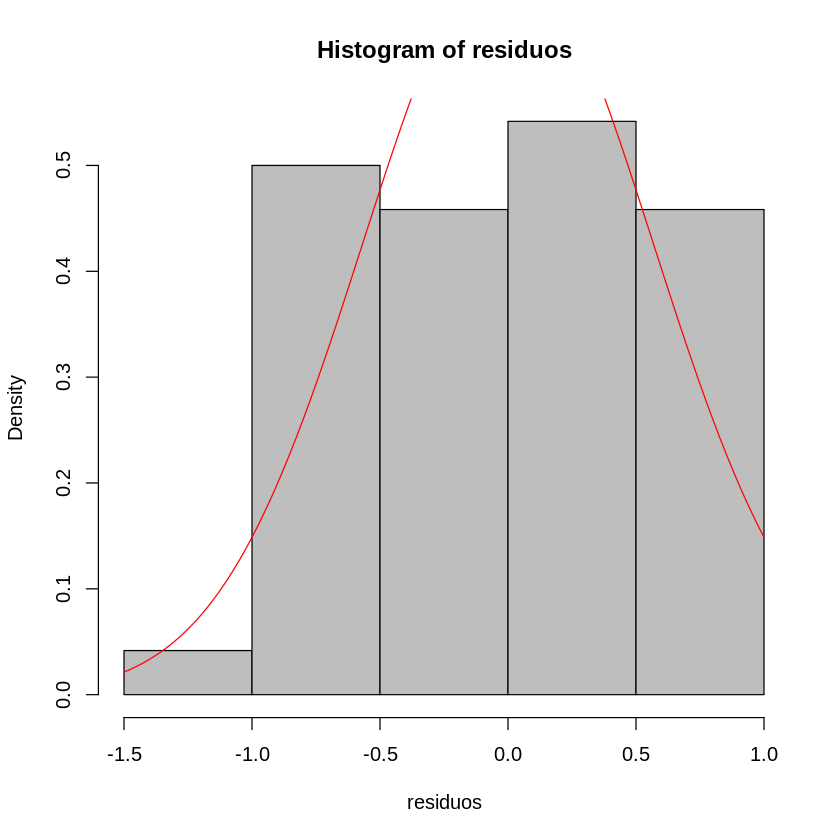

In [39]:
hist(residuos, prob=T,col="gray")
x=residuos
m<-mean(x)
s<-sd(x)
curve(dnorm(x,mean=m,sd=s), col="red", add=TRUE)

Diagrama de caja

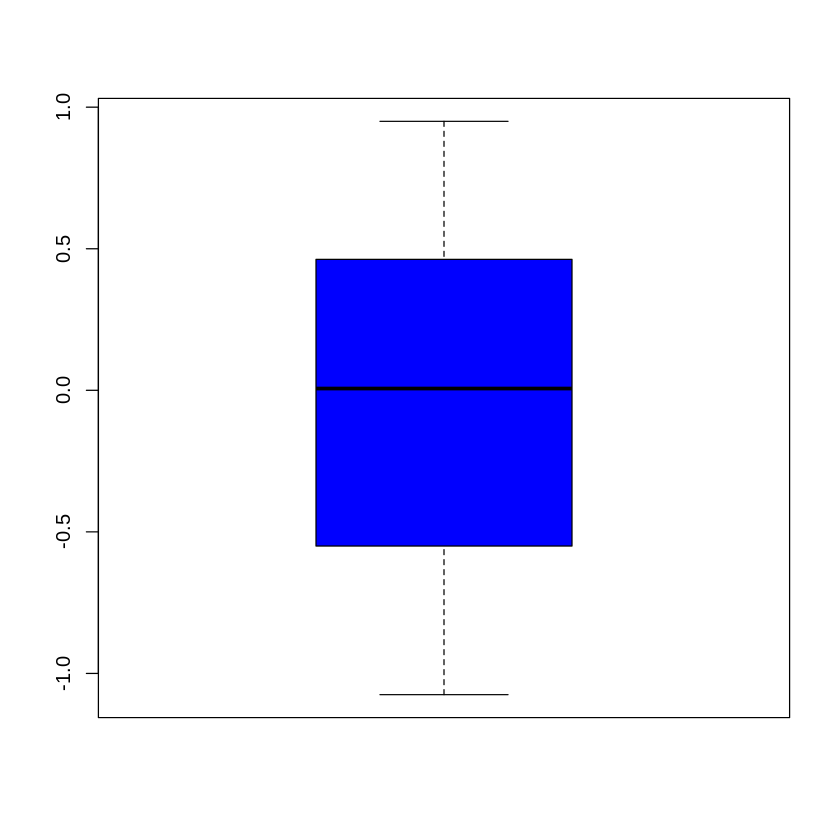

In [41]:
boxplot(m1$res, col="blue")

Prueba de Shapiro

In [42]:
shapiro.test(residuos)


	Shapiro-Wilk normality test

data:  residuos
W = 0.96071, p-value = 0.1078


No se rechaza la hipótesis nula, por lo que los residuos tienen una distribución normal.

**Homocedasticidad de varianza de los errores**

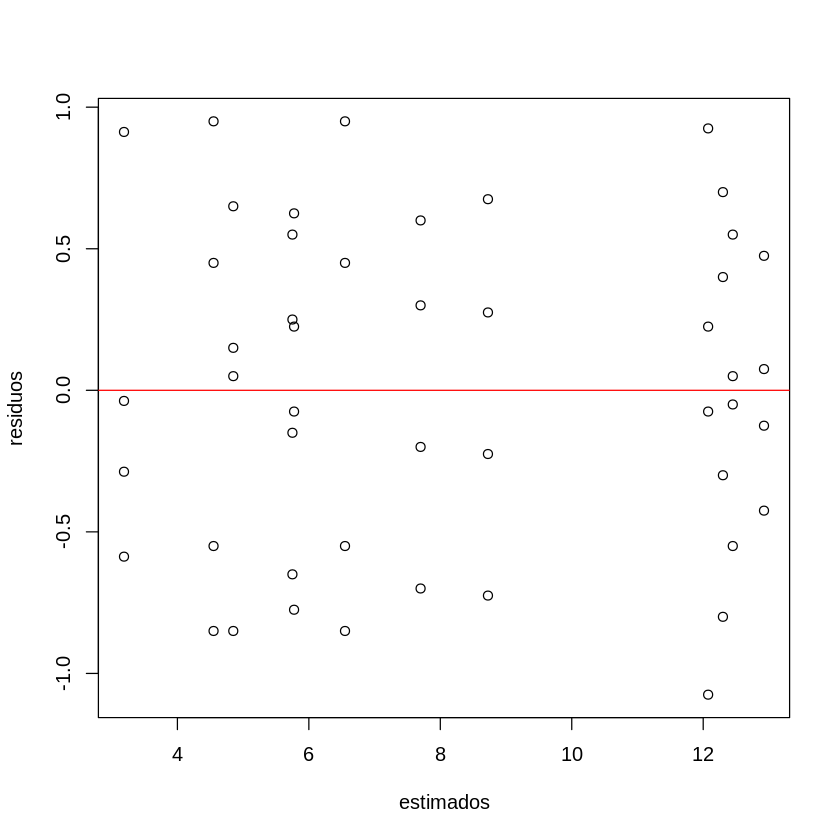

In [43]:
plot(estimados,residuos)
abline(h=0,col="red")

Prueba de Bartlett

In [57]:
bartlett.test(residuos,Pelet:Temperatura:Salinidad)


	Bartlett test of homogeneity of variances

data:  residuos and Pelet:Temperatura:Salinidad
Bartlett's K-squared = 3.35, df = 11, p-value = 0.9852


No se rechaza la hipótesis nula, por lo que las varianzas son homogéneas.

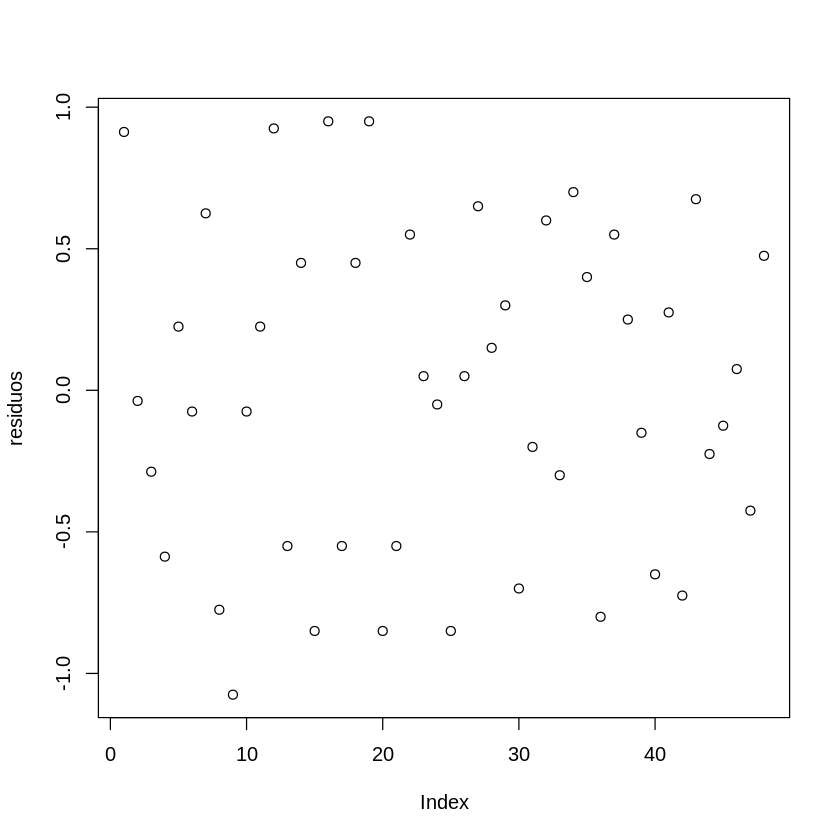

In [45]:
plot(residuos)

**Prueba de independencia de los errores**

In [46]:
library(tseries)

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



$H_0$: No hay correlacion (prueba de rachas, para probar no correlación de residuos)

In [47]:
runs.test(as.factor(m1$residual>0))


	Runs Test

data:  as.factor(m1$residual > 0)
Standard Normal = 1.7508, p-value = 0.07998
alternative hypothesis: two.sided


No se rechaza $H_0$ por lo que no hay correlación entre los residuos.